# Preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataPath = "./data/dataset.csv"
df = pd.read_csv(dataPath, index_col=0)

In [3]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
columns = list(df.columns)
columnsToKeep = columns[4: -1]
columnsToKeep
df = df[columnsToKeep]

In [5]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [6]:
pd.isnull(df).sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [7]:
# df.loc[:, 'explicit'] = df['explicit'].astype(int)

# #--
# # One hot encoding for nominal categroies
# df = pd.get_dummies(df, columns=['key', 'time_signature'], dtype=int)

# def min_max_scaling(df):
#     min_vals = df.min()
#     max_vals = df.max()

#     feature_range = max_vals - min_vals

#     # Check if any feature has zero range
#     zero_range_features = feature_range[feature_range == 0].index

#     # Remove features with zero range from normalization
#     valid_features = feature_range[feature_range != 0].index
#     df_normalized = (df[valid_features] - min_vals[valid_features]) / feature_range[valid_features]

#     # Concatenate back the zero range features
#     if not zero_range_features.empty:
#         df_normalized = pd.concat([df_normalized, df[zero_range_features]], axis=1)

#     return df_normalized

# def standard_scaling(df):
#     mean = df.mean()
#     std = df.std()
#     return (df - mean) / std

# # Usage:
# responseFrame = df.pop('valence')
# predictorFrame = df

# # Min-Max scaling for predictor variables
# df_normalized = min_max_scaling(predictorFrame)

# # Standard scaling for predictor variables
# df_standardized = standard_scaling(predictorFrame)

# # predictorFrame_scaled = df_normalized
# #--
# # df.info()

Proportion of Variance Explained: [0.19986226 0.10309419 0.09152787 0.0799113  0.07053    0.0683511
 0.06354308 0.05948441 0.05685536 0.05522462 0.04965256 0.04135012
 0.02965767 0.02164001 0.00931545]


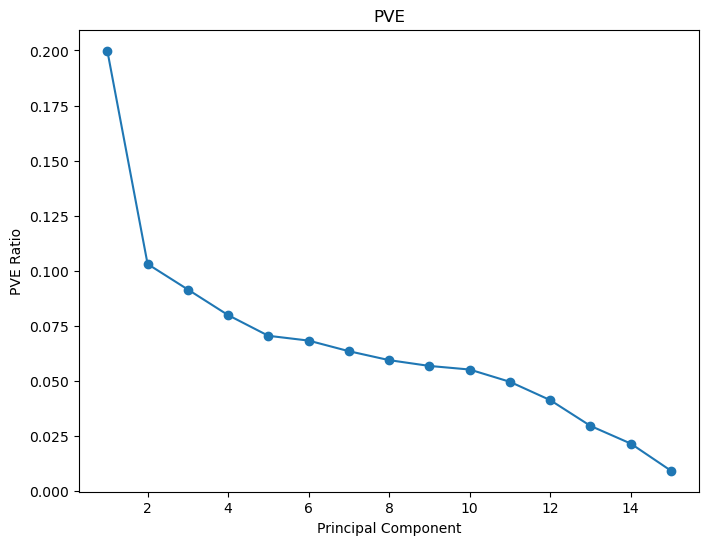

Cumulative Explained Variance: [0.19986226 0.30295645 0.39448432 0.47439561 0.54492561 0.61327672
 0.6768198  0.73630421 0.79315957 0.84838419 0.89803675 0.93938688
 0.96904454 0.99068455 1.        ]
Number of components to retain 95.0% variance: 13


In [8]:
def standard_scaling(df):
    mean = df.mean()
    std = df.std()
    return (df - mean) / std

predictorFrame = df
# Standard scaling for predictor variables
df_standardized = standard_scaling(predictorFrame)

# Calculate the covariance matrix
cov_matrix = np.cov(df_standardized, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Proportion of Variance Explained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Proportion of Variance Explained:", explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('PVE')
plt.xlabel('Principal Component')
plt.ylabel('PVE Ratio')
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)
target_variance = 0.95
n_components = np.where(cumulative_variance >= target_variance)[0][0] + 1
print("Number of components to retain {}% variance:".format(target_variance * 100), n_components)

# Transforming to the new space
transformed_data = np.dot(df_standardized, eigenvectors[:, :n_components])
principal_df = pd.DataFrame(data=transformed_data, columns=[f"PC{i}" for i in range(1, n_components + 1)])

# Concatenate the principal components DataFrame with the original DataFrame
final_df = pd.concat([principal_df, df.reset_index()], axis=1)

In [9]:
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.727050,-0.932325,0.141366,-0.262382,1.282330,-0.529691,-1.620008,0.705205,1.576104,-0.801263,...,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,-3.267366,-1.535049,-0.055082,0.960403,1.452488,0.008448,-0.546181,-0.075326,0.445458,0.548339,...,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,-1.414183,-0.000150,-0.232058,1.014676,1.893970,0.358584,-0.841691,0.811103,0.310400,0.993784,...,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,-3.805440,0.201438,0.277193,2.225745,1.808335,-1.151770,1.855165,-0.225599,0.067527,-1.970644,...,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,-0.950456,-0.431739,-0.617840,0.802149,2.500421,-0.379161,-0.092189,-0.170057,0.130157,-0.001884,...,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-3.460034,2.094821,-0.557797,-0.621695,0.511048,1.933844,-0.326935,-2.640999,-0.046120,1.024875,...,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,-5.004600,1.586670,0.142234,-1.117570,0.410984,1.466360,-0.774780,0.023699,1.310760,-0.332850,...,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,-1.097003,-1.323226,-0.958939,-0.129505,-0.175279,0.604925,-0.005773,0.011698,1.163979,-1.820906,...,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,-0.473415,0.039181,-0.443343,0.449717,0.209255,-0.421960,-0.309162,-0.868521,-0.744321,-0.228663,...,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [10]:
df.sort_values('valence', ascending = False).head(10)
# predictorFrame_scaled
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [11]:
df.describe().transpose()
# predictorFrame_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


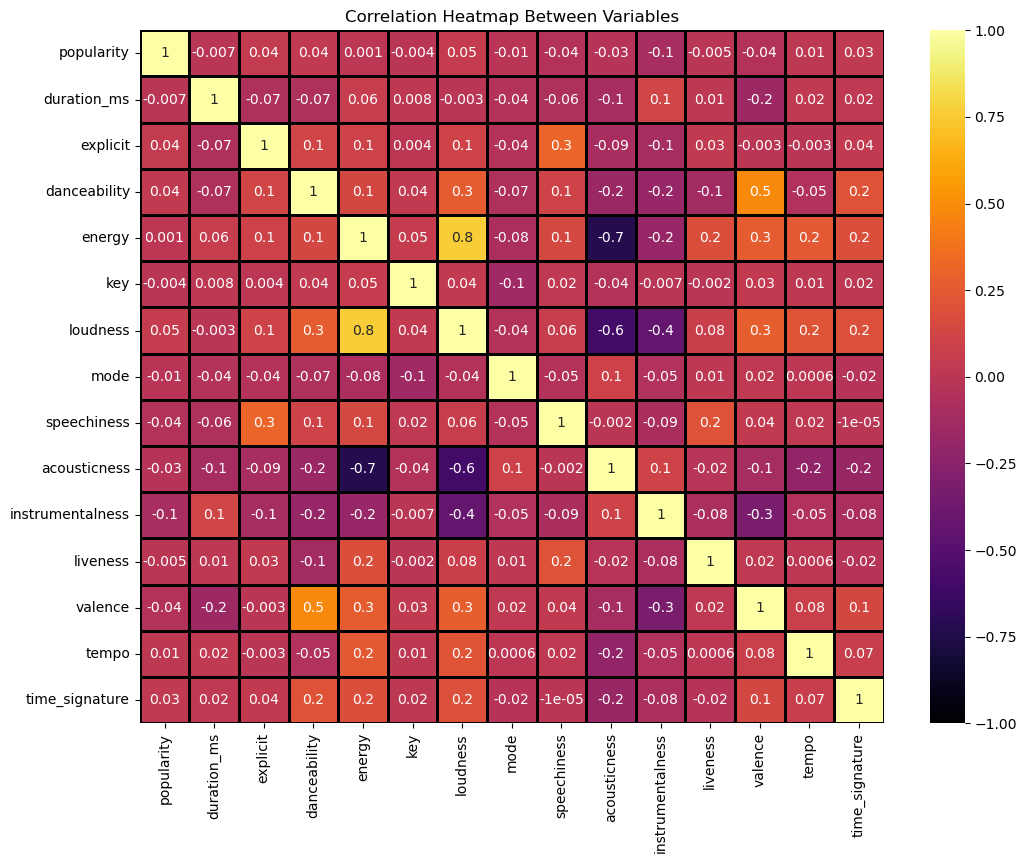

In [12]:
corr_df = df.corr(method="pearson")

plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", 
                      vmin=-1, vmax=1, center=0, cmap="inferno", 
                      linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

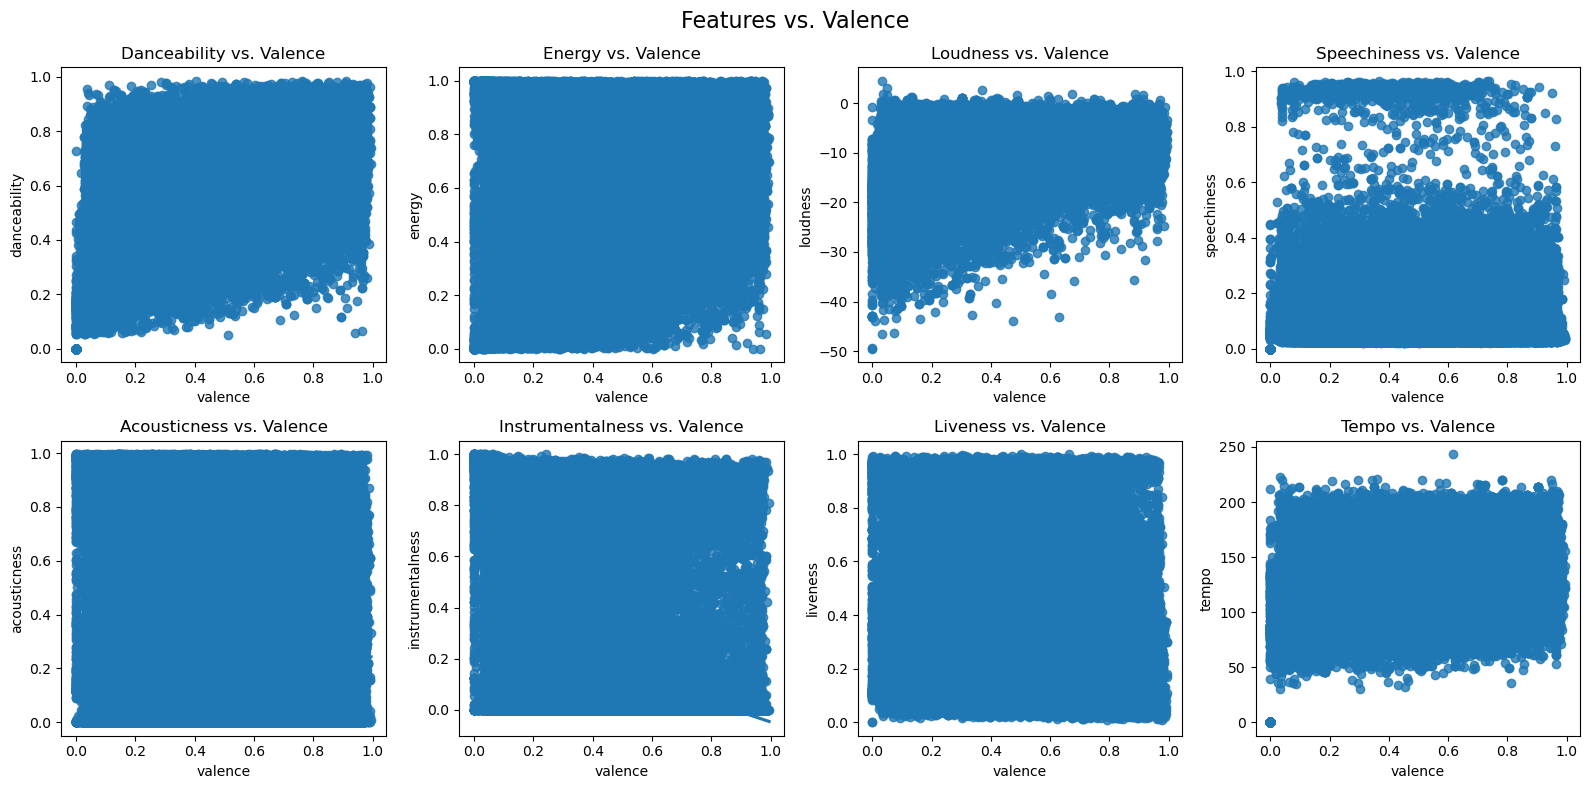

In [13]:
# List of features to plot
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "tempo"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Features vs. Valence", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and plot each one against valence
for i, feature in enumerate(features):
    sns.regplot(data=df, y=feature, x="valence", ax=axes[i])
    axes[i].set_title(f"{feature.capitalize()} vs. Valence")

# Adjust layout
plt.tight_layout()
plt.show()

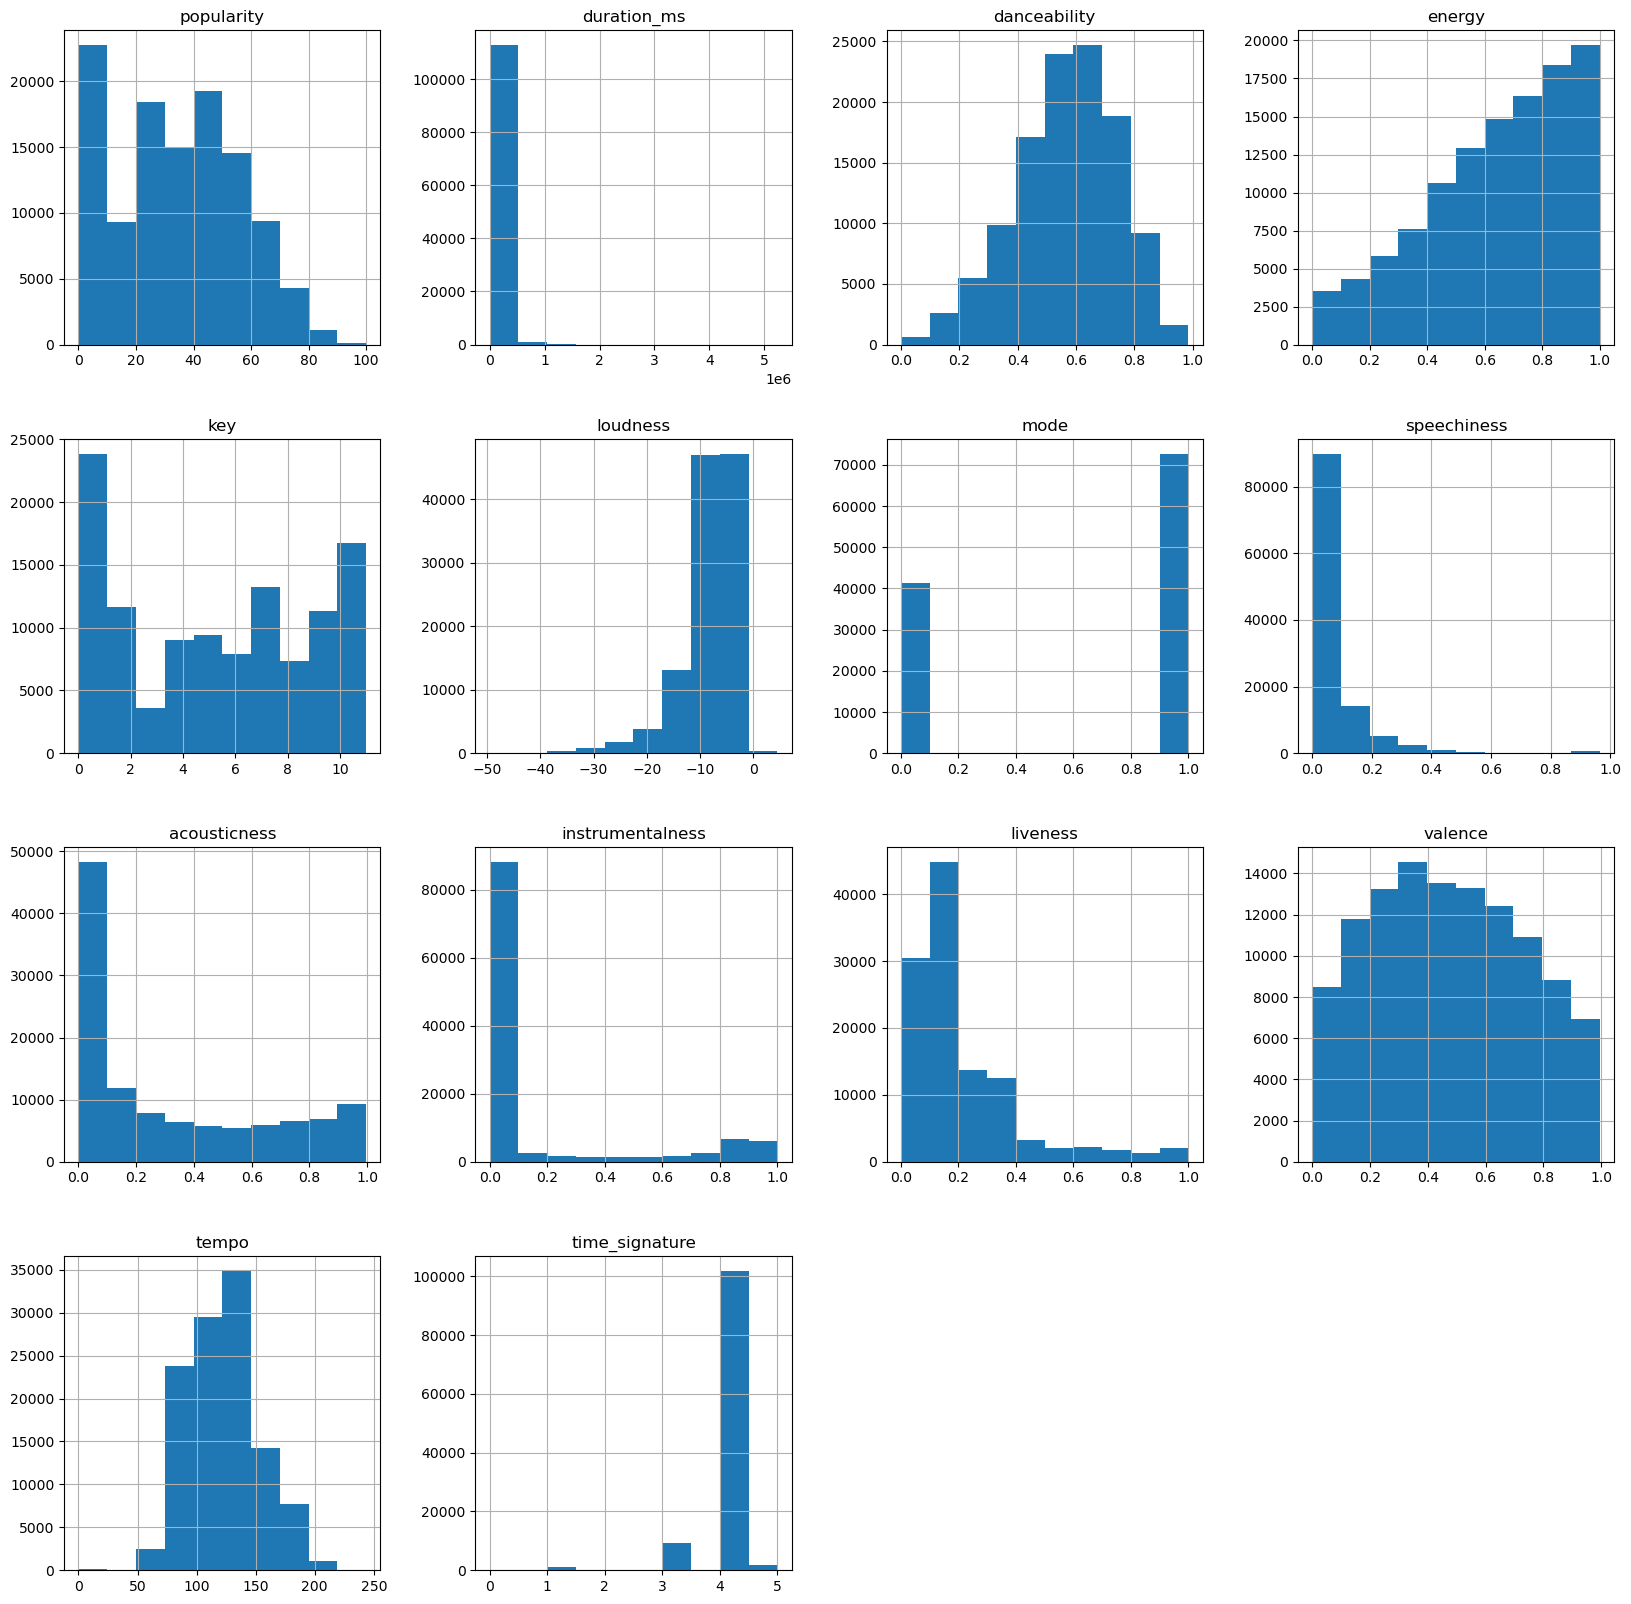

In [14]:
df.hist(figsize=(20, 20))
plt.show()

<Figure size 1600x800 with 0 Axes>

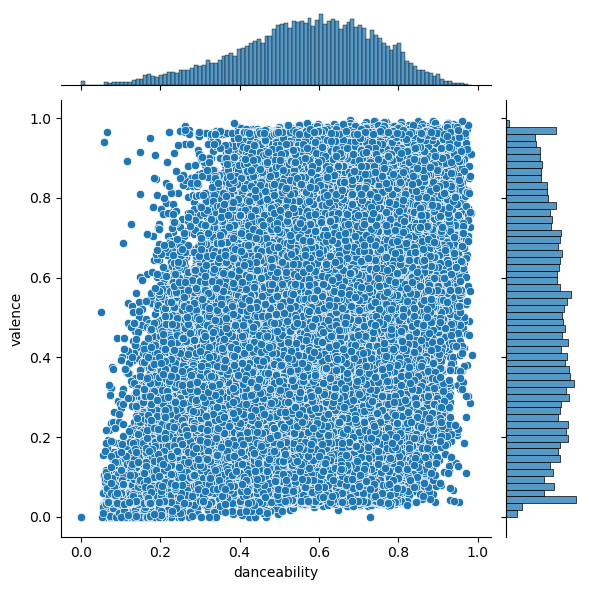

In [15]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=df['danceability'],y=df["valence"],data=df)